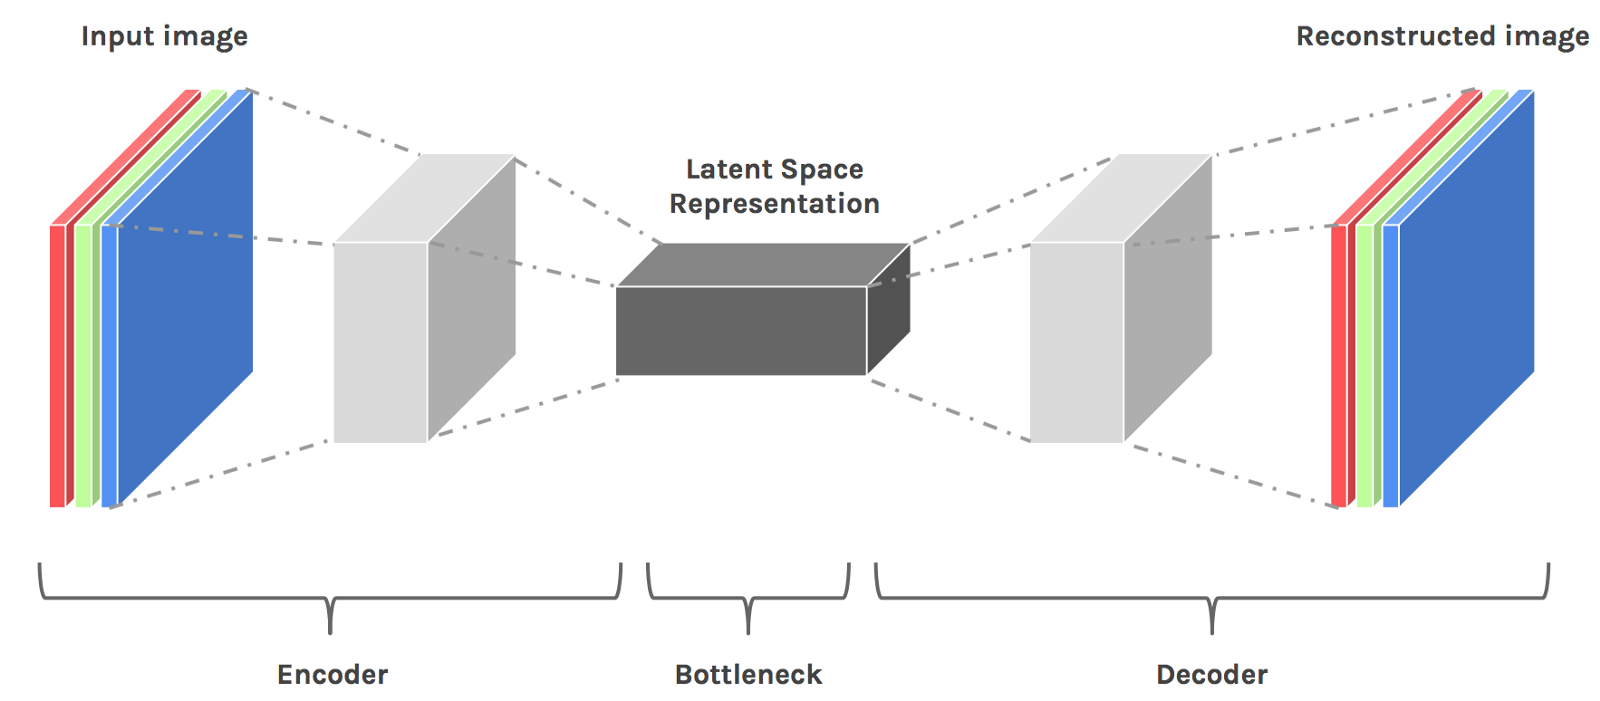

In [0]:
from IPython.display import Image
Image(filename="auto_encoder.png",width = 800)


# 2.UseCase 2 - Image Denoising
Autoencoders are pretty useful, lets look at another application of autoencoders - Image denoising. Many a times input images contain noise in the data, autoencoders can be used to get rid of those images. Lets see it in action. 

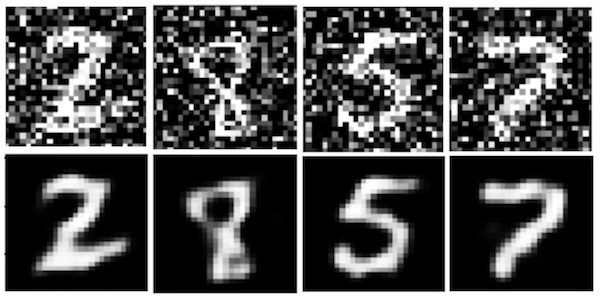

In [0]:
from IPython.display import Image
Image(filename = "/content/denoising-autoencoder.jpg",width = 500)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input,Dense, Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as k
import pandas as pd


In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) =fashion_mnist.load_data()

In [0]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)

x_train (60000, 28, 28)
x_test (10000, 28, 28)


In [0]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In this autoencoder network, we will add convolutional layers because convolutional networks works really well with the image inputs. To apply convolutions on image data, we will reshape our inputs in the form of 28 * 28 matrix. 

In [0]:
x_train = x_train.reshape(len(x_train),28,28,1)

In [0]:
x_test = x_test.reshape(len(x_test),28,28,1)

In [0]:
def reshape(img):
  return np.reshape(img,[28,28])

## Before adding noise

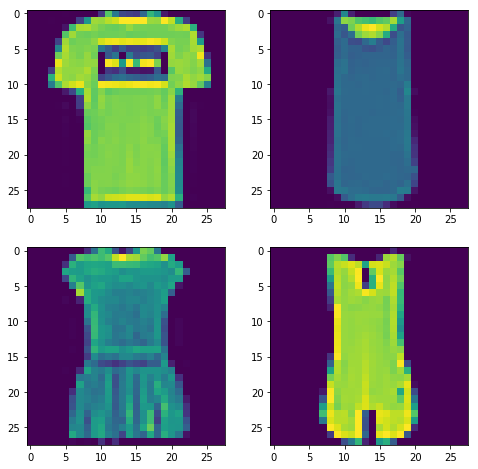

In [0]:
w=3     #plotting  a subplot of pre images i.e(denoised images)nothing to get confused.
h=2
fig=plt.figure(figsize=(8, 8))
columns = 2
rows =2
for i in range(1, columns*rows +1):
    img = reshape(x_train[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [0]:
noise_scale = 0.2
noised_x_train = x_train + noise_scale *np.random.randn(len(x_train),28,28,1)

## After adding noise

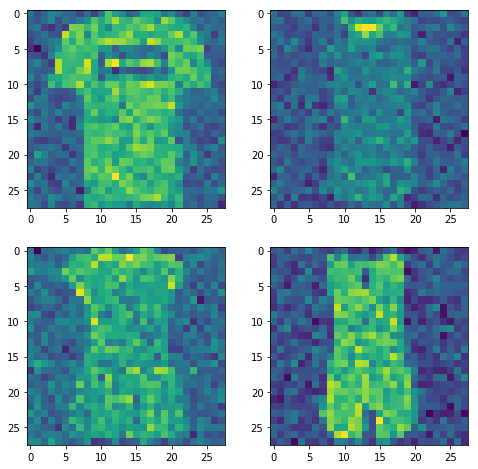

In [0]:
w=3     #plotting  a subplot of noised images.
h=2
fig=plt.figure(figsize=(8, 8))
columns = 2
rows =2
for i in range(1, columns*rows +1):
    img = reshape(noised_x_train[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


### In this section, lets create an autoencoder architecture with convulution prospective.

Lets now create the model architecture for the autoencoder. Lets understand what type of network needs to be created for this problem.

### Encoding Architecture:

The encoding architure is composed of 2 Convolutional Layers and 2 Max Pooling Layers stacked one by one. Relu is used as the activation function in the convolution layers and padding is kept as "same". Role of max pooling layer is to downsample the image dimensions. This layer applies a max filter to non-overlapping subregions of the initial representation.

### Decoding Architecture:

Similarly in decoding architecture, the convolution layers will be used having same dimensions (in reverse manner) as the encoding architecture. But instead of 2 maxpooling layers, we will be adding 2 upsampling layers. Again the activation function will be same (relu), and padding in convolution layers will be same as well. Role of upsampling layer is to upsample the dimensions of a input vector to a higher resolution or dimension. 



In [0]:
##input layer###
input_layer = Input(shape = (28,28,1))

In [0]:
##encoding_layers##
encoding_layer_1 = Conv2D(500,(3,3),activation = 'relu',padding = "same")(input_layer)
encoding_layer_1 = MaxPooling2D((2,2),padding = 'same')(encoding_layer_1)#>>doing max pooling with  respect to encoding_layer1
encoding_layer_2 = Conv2D(300,(3,3),activation = 'relu',padding = 'same')(encoding_layer_1)
encoding_layer_final = MaxPooling2D((2,2),padding = 'same')(encoding_layer_2)
print(encoding_layer_final)


Tensor("max_pooling2d_35/MaxPool:0", shape=(?, 7, 7, 300), dtype=float32)


In [0]:
###code laye####
code_neurons = 10
code_layer = Dense( code_neurons,activation = 'sigmoid')(encoding_layer_final)

In [0]:
decoding_layer_1 = Conv2D(100,(3,3),activation = 'relu',padding  = 'same')(code_layer)
decoding_layer_1 = UpSampling2D((2,2))(decoding_layer_1)
decoding_layer_2  = Conv2D(300,(3,3),activation = 'relu',padding = 'same')(decoding_layer_1)
decoding_layer_2 = UpSampling2D((2,2))(decoding_layer_2)
output_layer_final = Conv2D(1,(3,3),activation = 'relu',padding = 'same')(decoding_layer_2)  #here we are using sigmoid because it will scale up the values from (0-1)







In [0]:
auto_encoder = Model(input_layer,output_layer_final)#our model

## Model Summary

In [0]:
auto_encoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 28, 28, 500)       5000      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 500)       0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 14, 14, 300)       1350300   
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 300)         0         
_________________________________________________________________
dense_5 (Dense)              (None, 7, 7, 10)          3010      
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 7, 7, 100)         910

In [0]:
auto_encoder.compile(optimizer = "adadelta",loss = 'binary_crossentropy')

In [0]:
auto_encoder.fit(x_train,x_train,epochs = 20,batch_size = 1000)

Epoch 1/20
60000/60000 [==============================] - 55s 914us/step - loss: 0.2886
Epoch 2/20
60000/60000 [==============================] - 55s 911us/step - loss: 0.2905
Epoch 3/20
60000/60000 [==============================] - 55s 911us/step - loss: 0.2904
Epoch 4/20
60000/60000 [==============================] - 55s 911us/step - loss: 0.2899
Epoch 5/20
60000/60000 [==============================] - 55s 910us/step - loss: 0.2905
Epoch 6/20
60000/60000 [==============================] - 55s 909us/step - loss: 0.2902
Epoch 7/20
60000/60000 [==============================] - 54s 908us/step - loss: 0.2872
Epoch 8/20
60000/60000 [==============================] - 55s 909us/step - loss: 0.2899
Epoch 9/20
60000/60000 [==============================] - 55s 909us/step - loss: 0.2883
Epoch 10/20
60000/60000 [==============================] - 55s 910us/step - loss: 0.2845
Epoch 11/20
60000/60000 [==============================] - 55s 910us/step - loss: 0.2869
Epoch 12/20
60000/60000 [=====

In [0]:
predictor =  auto_encoder.predict(x_train)

In [0]:
def reshape(img):
  return np.reshape(img,[28,28])

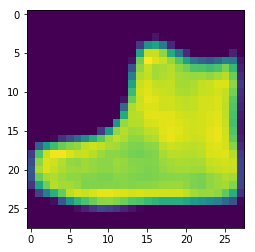

In [0]:
plt.imshow(reshape(predictor[0]))#predicted images

# Input images

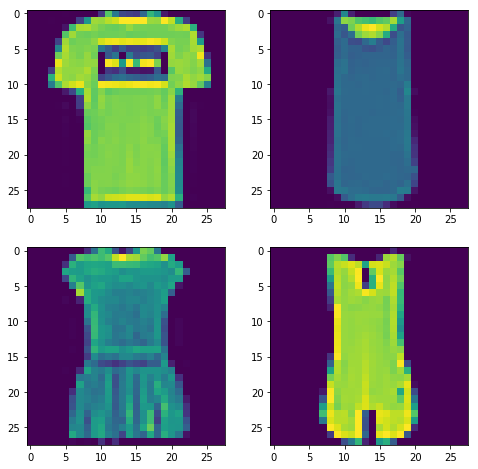

In [0]:
w=3     #plotting  a subplot of input images 
h=2
fig=plt.figure(figsize=(8, 8))
columns = 2
rows =2
for i in range(1, columns*rows +1):
    img = reshape(x_train[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# auto encoder predicted images

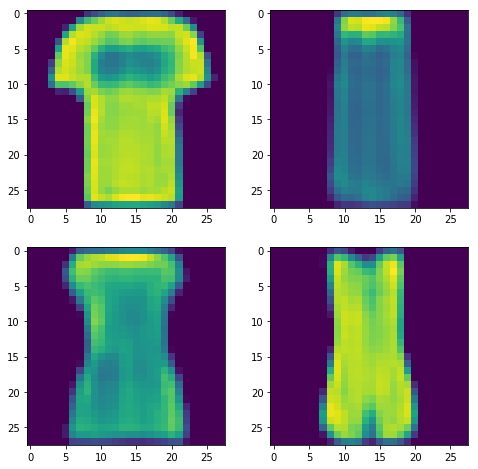

In [0]:
w=3     #plotting  a subplot of predicted  images 
h=2
fig=plt.figure(figsize=(8, 8))
columns = 2
rows =2
for i in range(1, columns*rows +1):
    img = reshape(predictor[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### In this implementation, I have not trained this network for longer epochs, but for better predictions, you can train the network for larger number of epochs say somewhere in the range of 500 - 1000.



### References:
https://www.analyticsvidhya.com/blog/2018/06/unsupervised-deep-learning-computer-vision
https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798  
https://blog.keras.io/building-autoencoders-in-keras.html
https://cs.stanford.edu/people/karpathy/convnetjs/demo/autoencoder.html  
https://machinelearningmastery.com/develop-enc